In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
os.chdir('..')

In [3]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import pickle

from data_loading import get_movielens_data
from evaluation import evaluate_policy
from policies.dlintsrp import D_LinTS_RP
from policies.cbrap import CBRAP
from policies.linucb import LinUCB
from policies.linear_ts import LinearTS
from policies.d_lin_ts import DLinTS
from policies.random import RandomPolicy
from policies.egreedy import EGreedy
from policies.deepfm import DeepFM_OnlinePolicy
from reduct_matrix import get_reduct_matrix

from sklearn.model_selection import train_test_split

In [4]:
# Reproducibility
seed = 42
np.random.seed(seed)

In [5]:
times = 3000

In [6]:
dataset = get_movielens_data(times, tune=False)

DeepCTR-PyTorch version 0.2.9 detected. Your version is 0.2.2.
Use `pip install -U deepctr-torch` to upgrade.Changelog: https://github.com/shenweichen/DeepCTR-Torch/releases/tag/v0.2.9


Dataset creation took 11.127767086029053 s.


### Define policies

In [7]:
total_start_ts = time.time()

#### Introduce nonstationarity

In [8]:
CHANGE_POINTS = [1, 5000, 10000, 20000, 35000, 50000, 65000, 80000, 90000, 100000]

In [9]:
intervals = list(zip(CHANGE_POINTS, CHANGE_POINTS[1:]))
intervals

[(1, 5000),
 (5000, 10000),
 (10000, 20000),
 (20000, 35000),
 (35000, 50000),
 (50000, 65000),
 (65000, 80000),
 (80000, 90000),
 (90000, 100000)]

In [10]:
SHIFT_SIZE = 0.33

In [11]:


def evaluation_nonstationarity_function(trial, arm, num_of_arms):
    """Takes trial and arm index as input and returns index of arm with which to swap."""
    N_ARMS = num_of_arms
    shift_size_int = int(SHIFT_SIZE * N_ARMS)

    # intervals = [1, 5000, 10000, 20000, 35000, 50000, 65000, 80000, 100000]
    intervals = CHANGE_POINTS
    for i, (start, end) in enumerate(zip(intervals, intervals[1:])):
        if start <= trial < end:
            return (arm + i * shift_size_int) % N_ARMS
    return arm



### Run evaluation

#### Define policies

In [12]:
ctx_dim = 120


policies = {
    # Tuned
#     'LinearTS': LinearTS(context_dimension=ctx_dim, nu=0.3, seed=seed),
#     'LinUCB': LinUCB(context_dimension=ctx_dim, alpha=0.9),
#     'EGreedy': EGreedy(epsilon=0.001),
#     'DLinTS': DLinTS(context_dimension=ctx_dim, gamma=0.999, a=0.2,  seed=seed),
#     'CBRAP d=6': CBRAP(context_dimension=ctx_dim, red_dim=6, alpha=0.3),
#     'CBRAP d=12': CBRAP(context_dimension=ctx_dim, red_dim=12, alpha=0.7),
#     'CBRAP d=24': CBRAP(context_dimension=ctx_dim, red_dim=24, alpha=0.5),
#     'CBRAP d=60': CBRAP(context_dimension=ctx_dim, red_dim=60, alpha=0.4),
#     'CBRAP d=120': CBRAP(context_dimension=ctx_dim, red_dim=120, alpha=0.6),
#     'D-LinTS-RP d=6': D_LinTS_RP(context_dimension=ctx_dim, red_dim=6, gamma=0.9, a=0.1, seed=seed),
#     'D-LinTS-RP d=12': D_LinTS_RP(context_dimension=ctx_dim, red_dim=12, gamma=0.99, a=0.1, seed=seed),
#     'D-LinTS-RP d=24': D_LinTS_RP(context_dimension=ctx_dim, red_dim=24, gamma=0.9, a=0.1, seed=seed),
#     'D-LinTS-RP d=60': D_LinTS_RP(context_dimension=ctx_dim, red_dim=60, gamma=0.999, a=0.2, seed=seed),
#     'D-LinTS-RP d=120': D_LinTS_RP(context_dimension=ctx_dim, red_dim=120, gamma=0.999, a=0.2, seed=seed),
    'DeepFM': DeepFM_OnlinePolicy(context_dimension=ctx_dim),
    'Random': RandomPolicy(),
}

In [13]:
results = {'reward': {}, 'ndcg': {}}
for p_name, policy in policies.items():
    start_ts = time.time()

    reward, ndcg = evaluate_policy(
        policy, times, dataset, nonstationarity_function=evaluation_nonstationarity_function
    )
    results['reward'][p_name] = reward
    results['ndcg'][p_name] = ndcg
    print(f"Total reward of {p_name} is {reward[-1][0]}")
    print(f"Total time of {p_name} is {datetime.timedelta(seconds=time.time() - start_ts)}")

Using evaluation dataset
First user in exp from 2009-01-03 22:16:37
Last user in exp from 2009-01-05 05:52:22
0
Params tuple 0
Params tuple 1
Params tuple 2
Params tuple 3
Params tuple 4
Params tuple 5
Params tuple 6
Params tuple 7
Params tuple 8
Params tuple 9
Params tuple 10
Params tuple 11
Params tuple 12
Params tuple 13
Params tuple 14
Params tuple 15
Params tuple 16
Params tuple 17
Params tuple 18
Params tuple 19
Params tuple 20
Params tuple 21
Params tuple 22
Params tuple 23
Params tuple 24
Params tuple 25
Params tuple 26
Params tuple 27
Params tuple 28
Params tuple 29
Params tuple 30
Params tuple 31
Params tuple 32
Params tuple 33
Params tuple 34
Params tuple 35
Params tuple 36
Params tuple 37
Params tuple 38
Params tuple 39
Params tuple 40
Params tuple 41
Params tuple 42
Params tuple 43
Params tuple 44
Params tuple 45
Params tuple 46
Params tuple 47
Params tuple 48
Params tuple 49
Params tuple 50
Params tuple 51
Params tuple 52
Params tuple 53
Params tuple 54
Params tuple 55
Pa

Params tuple 75
Params tuple 76
Params tuple 77
Params tuple 78
Params tuple 79
Params tuple 80
Params tuple 81
Params tuple 82
Params tuple 83
Params tuple 84
Params tuple 85
Params tuple 86
Params tuple 87
Params tuple 88
Params tuple 89
Params tuple 90
Params tuple 91
Params tuple 92
Params tuple 93
Params tuple 94
Params tuple 95
Params tuple 96
Params tuple 97
Params tuple 98
Params tuple 99
Params tuple 100
Params tuple 101
Params tuple 102
Params tuple 103
Params tuple 104
Params tuple 105
Params tuple 106
Params tuple 107
Params tuple 108
Params tuple 109
Params tuple 110
Params tuple 111
Params tuple 112
Params tuple 113
Params tuple 114
Params tuple 115
Params tuple 116
Params tuple 117
Params tuple 118
Params tuple 119
Params tuple 120
Params tuple 121
Params tuple 122
Params tuple 123
Params tuple 124
Params tuple 125
Params tuple 126
Params tuple 127
Params tuple 128
Params tuple 129
Params tuple 130
Params tuple 131
Params tuple 132
Params tuple 133
Params tuple 134
Param

In [14]:
# with open("movielens_results.pkl", "wb") as f:
#     pickle.dump(results, f)

### Plot results

In [15]:
def plot_ctrs_or_rewards(reward_dict, plot_type, change_points):
    if plot_type not in {'CTR', 'Cumulative reward'}:
        raise ValueError("plot_type should be CTR or Cumulative reward")
    fig, ax = plt.subplots(1,1, figsize=(15,8));
    N = 10
    sorted_reward_list = sorted(
        [
            (l,r) for l, r in reward_dict.items()
        ],
        key=lambda x: x[1][-1],
        reverse=True,
    )
    
    # Find out largest value. Do this first so change points appear first in the legend.
    max_vline = 0
    for ind, (label, reward) in enumerate(sorted_reward_list):
        times = (range(1, len(reward)+1))
        
        rewards = [r for r,t in zip(reward, times)]
        ctr = [r/t for r,t in zip(reward, times)]
        if plot_type == 'CTR':
            to_plot = ctr
            max_vline=max(max_vline, max(ctr))
        else:
            to_plot = rewards

            max_vline=max(max_vline, max(rewards))
            
        ax.plot(to_plot[N:], label=label)
        
    reward_change_points = change_points[1:-1]
    plt.vlines(
        reward_change_points, ymin=0, ymax=max_vline, alpha=0.65
    )    
     
    extraticks = change_points
    plt.xticks(extraticks, rotation=20)
#     plt.yticks(fontsize=25)
    
    ax.set_xlabel('Trial')
    ax.set_ylabel(f'{plot_type}')

    plt.legend();
    plt.show();

In [16]:
def plot_ndcg(cumulative_ndcg_dict):
    fig, ax = plt.subplots(1,1, figsize=(15,8));
    
    N = 10
    
    cumulative_ndcg_list = sorted(
        [
            (l,r) for l, r in cumulative_ndcg_dict.items()
        ],
        key=lambda x: x[1][-1],
        reverse=True,
    )
    
    for label, cumulative_ndcg in cumulative_ndcg_list:
        times = (range(1, len(cumulative_ndcg)+1))
        average_cumulative_ndcg = [cn/t for cn,t in zip(cumulative_ndcg, times)]
        ax.plot(average_cumulative_ndcg[N:], label=label)
        
    ax.set_xlabel('Trial')
    ax.set_ylabel('Average Cumulative NDCG@5')
    ax.set_title('Average Cumulative NDCG@5 on MovieLens')

    plt.legend();
    plt.show();

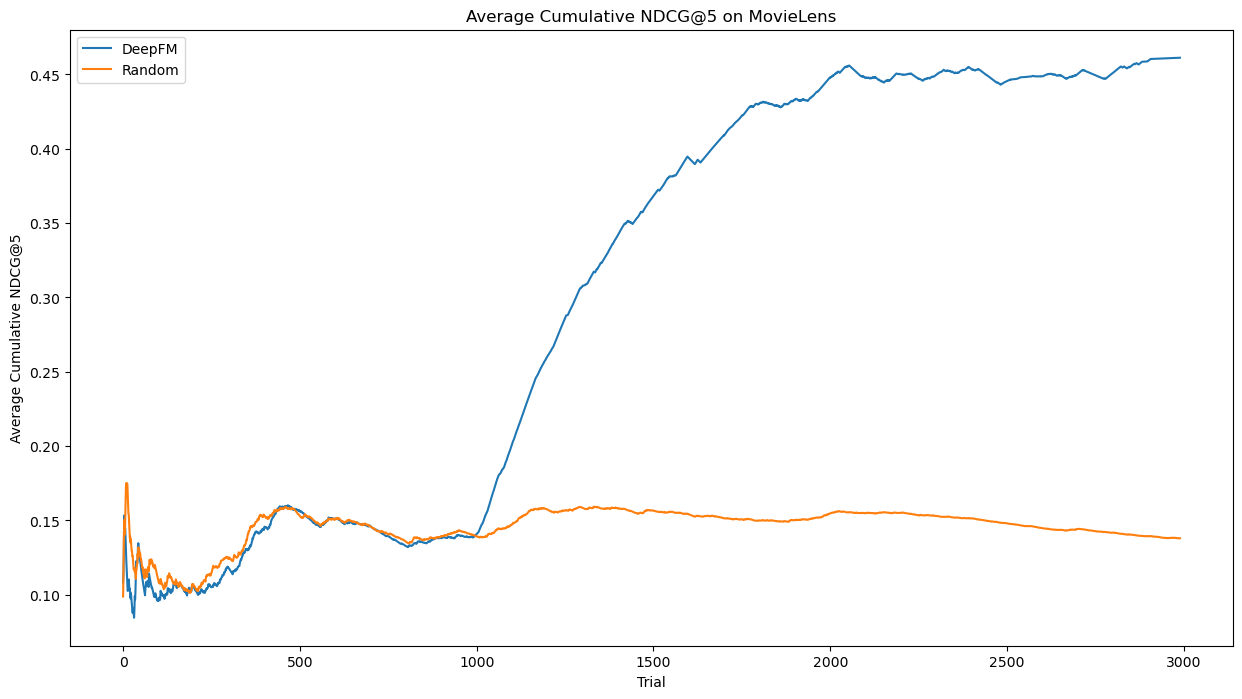

In [17]:
plot_ndcg(results['ndcg'])

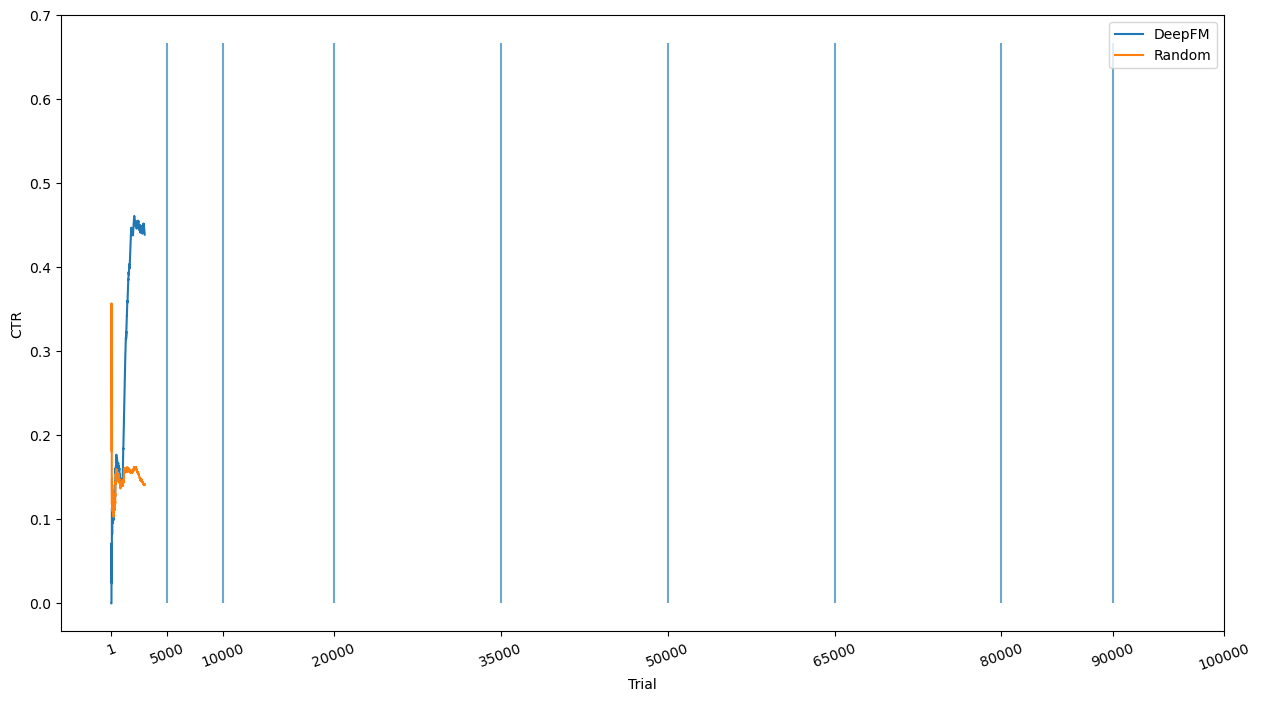

In [18]:
plot_ctrs_or_rewards(results['reward'], 'CTR', CHANGE_POINTS)

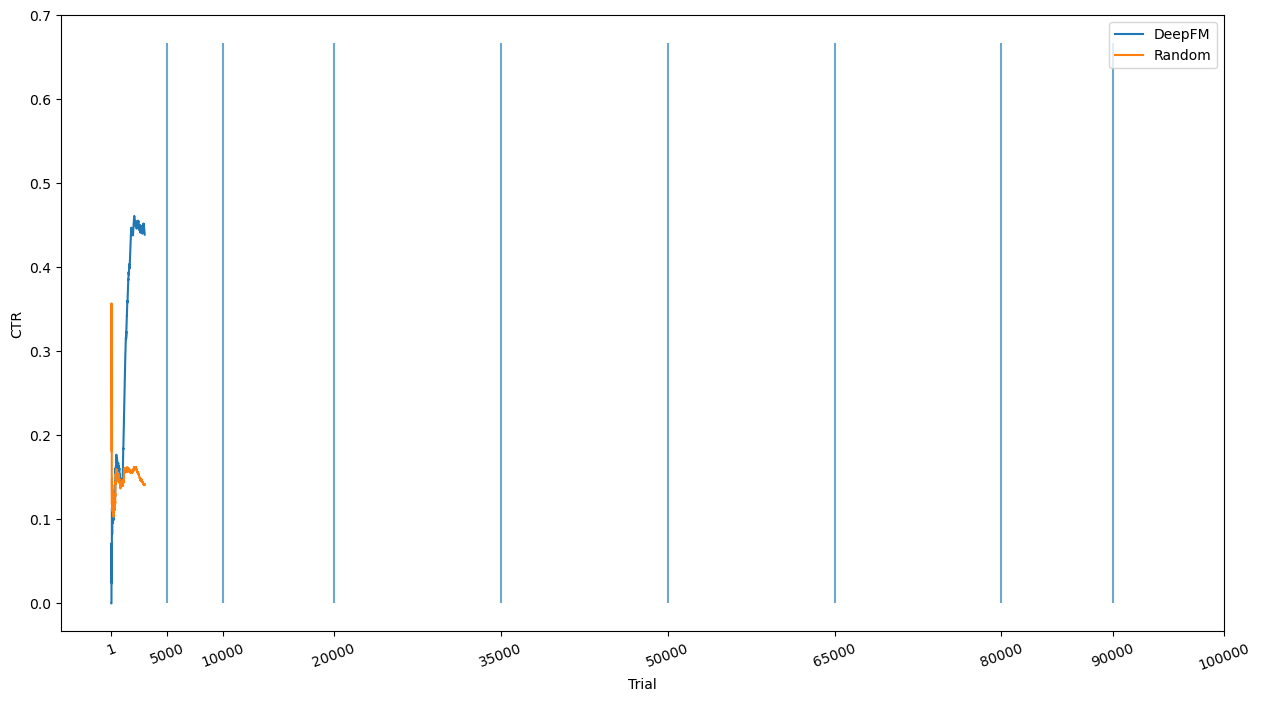

In [19]:
plot_ctrs_or_rewards(results['reward'], 'CTR', CHANGE_POINTS)

In [20]:
print(f"Total time is {datetime.timedelta(seconds=time.time() - total_start_ts)}")

Total time is 0:01:27.028231


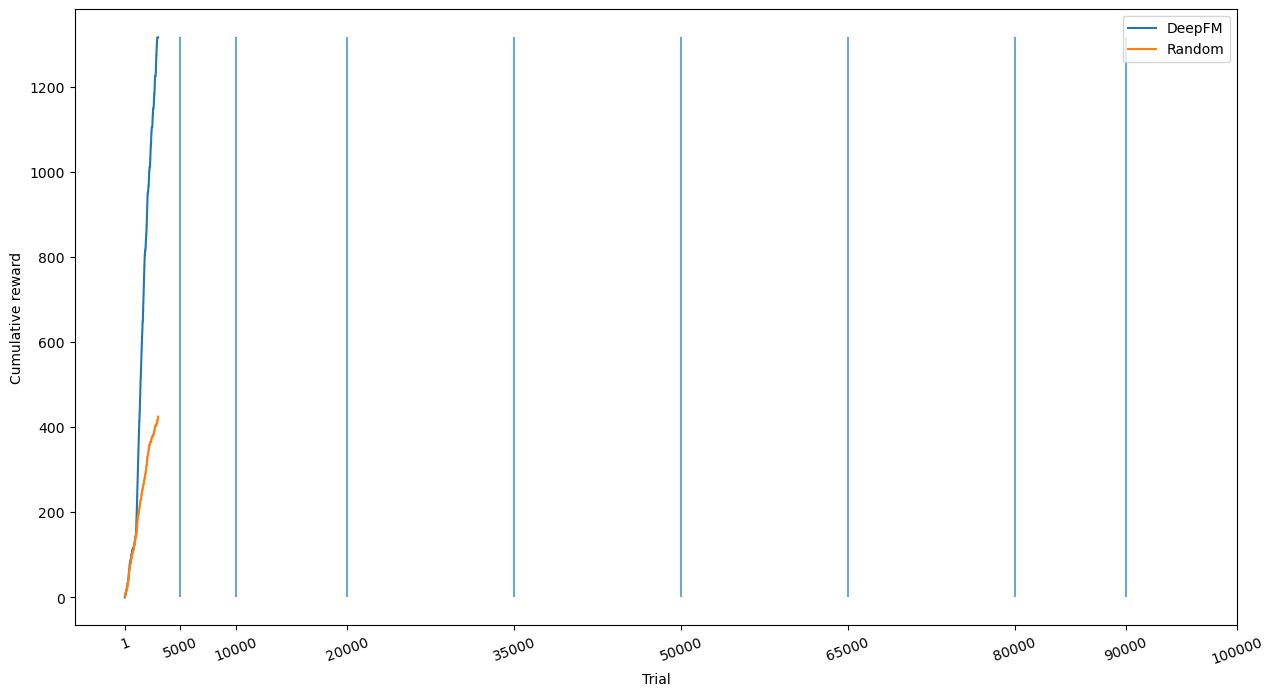

In [21]:
plot_ctrs_or_rewards(results['reward'], 'Cumulative reward', CHANGE_POINTS)